In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np
%matplotlib inline

# Directories

In [11]:
#Reference directory
topdir = os.getcwd()

In [14]:
datadir = topdir + '/SimRuns'

#Two GWB powerlaws
run_1_dir = datadir + '/simGWB_1'

# Load Chains

In [15]:
#Load chains for run 1
chain_run_1 = np.loadtxt(run_1_dir + '/chain_1.txt')
burn_run_1 = int(0.25 * chain_run_1.shape[0])

# Load Parameter Files

In [18]:
#Load param files to iterate through pulsars in pta
with open(run_1_dir + '/parameters.json') as pf:
    param_dict_run_1 = json.load(pf)
    pf.close()

In [27]:
print(param_dict_run_1[len(param_dict_run_1)-1])
print(len(param_dict_run_1))

zlog10_A_gw_2
138


# Plot Histograms

In [52]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_histograms(data, labels, indices):
    #Takes in data (chain, already burned), labels (parameters), and indices of parameters we want to look at
    n_cols = 2
    n_rows = int(len(indices)/n_cols)
    n_bins = 30
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(10,5))
    ii = 0
    if n_rows == 1:
        for j in range(n_cols):
            print(indices[ii])
            print(labels[indices[ii]])
            axarr[j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
            axarr[j].set_xlabel(labels[indices[ii]])
            ii += 1
    else:    
        for i in range(n_rows):
            for j in range(n_cols):
                axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
                axarr[i][j].set_xlabel(labels[ii])
                ii += 1
    fig.tight_layout()
    plt.show()

In [53]:
indices = [len(param_dict_run_1)-2, len(param_dict_run_1)-1]
print(param_dict_run_1[indices[0]])

zlog10_A_gw_1


136
zlog10_A_gw_1
137
zlog10_A_gw_2


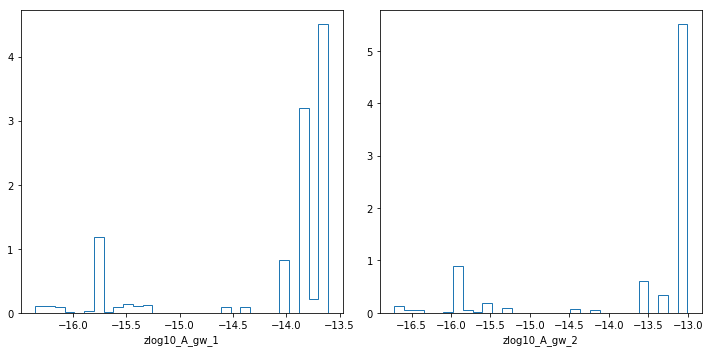

In [54]:
draw_histograms(chain_run_1[burn_run_1:],param_dict_run_1,indices)

# Trace Plots

In [62]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_trace(data, labels, indices):
    #Takes in data (chain, already burned), labels (parameters), and indices of parameters we want to look at
    n_cols = 2
    n_rows = int(len(indices)/n_cols)
    n_bins = 30
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(10,5))
    ii = 0
    if n_rows == 1:
        for j in range(n_cols):
            axarr[j].plot(data[:,indices[ii]])
            axarr[j].set_ylabel(labels[indices[ii]])
            ii += 1
    else:    
        for i in range(n_rows):
            for j in range(n_cols):
                axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
                axarr[i][j].set_ylabel(labels[ii])
                ii += 1
    fig.tight_layout()
    plt.show()

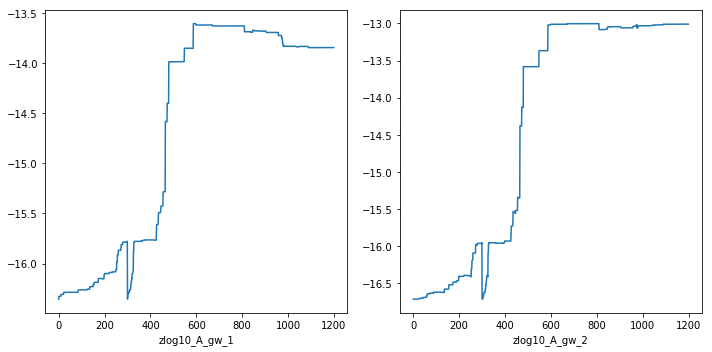

In [61]:
draw_trace(chain_run_1,param_dict_run_1,indices)

In [58]:
print(np.log10(1.5e-15))
print(np.log10(9.0e-15))

-14.823908740944319
-14.045757490560675
